In [108]:
import pandas as pd

In [109]:
df = pd.read_csv("/Users/adri22/Desktop/Inge2/ESME/SCIENCE TOOLS/AVA-Resto/LePetitFute.csv")

In [110]:
df.head(5)

,id,name,note,nbr_avis,type,quartier,prix
0,0,BRASSERIE DE LA TOUR EIFFEL,5/5,3,Bistrot – Brasserie,75007,€€
1,1,L'ARSENAL,"4,1/5",9,Bistrot – Brasserie,75004,€
2,2,LE CAFÉ DE PAULINE,"3,8/5",6,Cuisine française,75012,€
3,3,PARTIE DE CAMPAGNE,"2,7/5",24,Bistrot – Brasserie,75012,€
4,4,LE PAVÉ,"3,8/5",4,Cuisine française,75004,€€


In [111]:
print(df.loc[:,["name","note"]])

                             name   note
0     BRASSERIE DE LA TOUR EIFFEL    5/5
1                       L'ARSENAL  4,1/5
2              LE CAFÉ DE PAULINE  3,8/5
3              PARTIE DE CAMPAGNE  2,7/5
4                         LE PAVÉ  3,8/5
...                           ...    ...
6158                Pret A Manger   None
6159               SAS JIM ET LOD   None
6160                HEALTH INSIDE   None
6161    L'AUBERGE ESPAGNOLE PARIS   None
6162                 LE POPULAIRE   None

[6163 rows x 2 columns]


In [112]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='quartier', ylabel='note'>

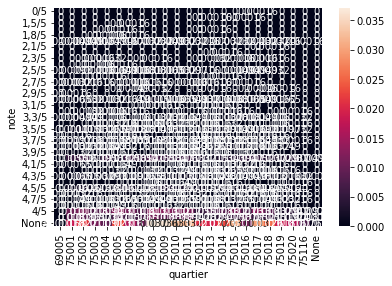

In [113]:
import seaborn as sns
sns.heatmap(pd.crosstab(df["note"],df[ "quartier"],normalize=True),
annot=True )

<AxesSubplot:ylabel='quartier'>

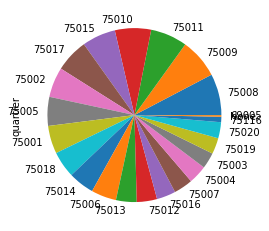

In [114]:
df["quartier"].value_counts(normalize=True).plot(kind='pie')

<AxesSubplot:xlabel='note', ylabel='quartier'>

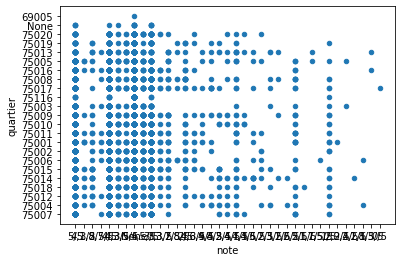

In [115]:
df.plot.scatter(x='note',y='quartier')

In [116]:
import matplotlib.pyplot as plt

In [117]:
nbr = df[['prix','quartier']].sort_values(by='prix', ascending=False)
nbr.head(7)

,prix,quartier
1346,€€€,75008
737,€€€,75008
1071,€€€,75016
844,€€€,75011
3163,€€€,75006
2403,€€€,75005
840,€€€,75005


array([[<AxesSubplot:title={'center':'None'}>,
        <AxesSubplot:title={'center':'€'}>],
       [<AxesSubplot:title={'center':'€€'}>,
        <AxesSubplot:title={'center':'€€€'}>]], dtype=object)

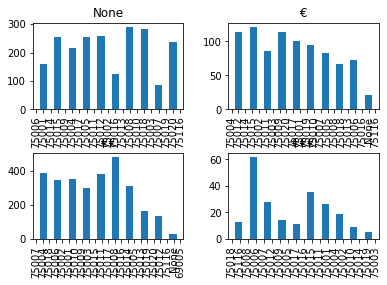

In [118]:
df.hist(column='quartier',by='prix', rwidth=0.5)


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

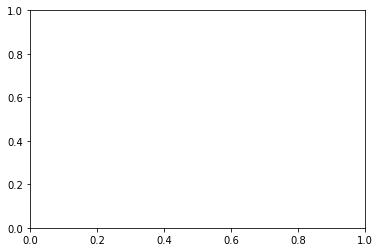

In [119]:
df.boxplot(column='quartier',by='prix')

<AxesSubplot:ylabel='prix'>

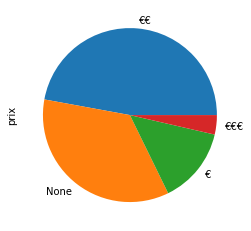

In [ ]:
df['prix'].value_counts().plot.pie()

In [124]:
df.head(3)



,id,name,note,nbr_avis,type,quartier,prix
0,0,BRASSERIE DE LA TOUR EIFFEL,5/5,3,Bistrot – Brasserie,75007,€€
1,1,L'ARSENAL,"4,1/5",9,Bistrot – Brasserie,75004,€
2,2,LE CAFÉ DE PAULINE,"3,8/5",6,Cuisine française,75012,€


In [ ]:
import re

In [310]:
fig = plt.figure()
quartier = df['quartier']

type = df['type']

prix = df['prix']

nbr_avis = df['nbr_avis']
o=[] 

for i in prix  :
    

    Prix_nv= re.compile(r'€').findall(i)  
      
    if len(Prix_nv)==1:
        o.append(1)
            
    elif len(Prix_nv)==2:
        o.append(2)
            
    elif len(Prix_nv)==3:
        o.append(3)
    
    else :
        o.append(6)
        
                        
                    
g =[]

                  
for a in quartier :
    
    if a=='None':
        g.append(6)
    
    else :
        g.append(a)
        
                    
f=[]

                  
for a in nbr_avis :
    
    if a=='None':
        f.append(0)
    
    else :
        f.append(a)
        


new_df=df.assign(Prix_nouveau=o , Quartier_trie=g, nbr_avis_trie = f)
    
                
      
print(new_df.head(4))

   id                         name   note nbr_avis                 type  \
0   0  BRASSERIE DE LA TOUR EIFFEL    5/5        3  Bistrot – Brasserie   
1   1                    L'ARSENAL  4,1/5        9  Bistrot – Brasserie   
2   2           LE CAFÉ DE PAULINE  3,8/5        6    Cuisine française   
3   3           PARTIE DE CAMPAGNE  2,7/5       24  Bistrot – Brasserie   

  quartier prix  Prix_nouveau Quartier_trie nbr_avis_trie  
0    75007   €€             2         75007             3  
1    75004    €             1         75004             9  
2    75012    €             1         75012             6  
3    75012    €             1         75012            24  


<Figure size 432x288 with 0 Axes>

In [285]:
new_df['Quartier_trie']=new_df['Quartier_trie'].astype(float)

In [312]:
new_df['nbr_avis_trie']=new_df['nbr_avis_trie'].astype(float)

In [286]:
new_df.dtypes


id                 int64
name              object
note              object
nbr_avis          object
type              object
quartier          object
prix              object
Prix_nouveau       int64
Quartier_trie    float64
dtype: object

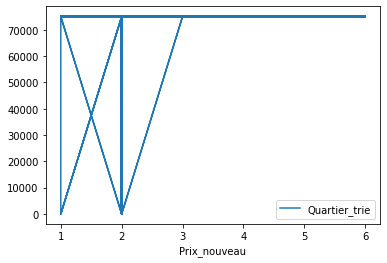

In [288]:
import matplotlib.pyplot as plt
new_df.plot(x="Prix_nouveau", y="Quartier_trie")
plt.show()

In [313]:
Prix_nouveau = new_df['Prix_nouveau']

Quartier_trie = new_df['Quartier_trie']

nbr_avis_trie = new_df['nbr_avis_trie']

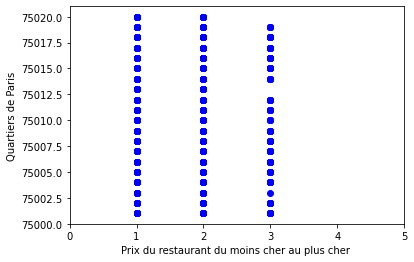

In [307]:
plt.plot(Prix_nouveau,Quartier_trie,'ob') # ob = type de points "o" ronds, "b" bleus

plt.ylabel('Quartiers de Paris')

plt.xlabel('Prix du restaurant du moins cher au plus cher ')

plt.axis([0, 5, 75000, 75021])

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

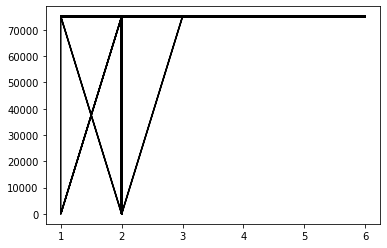

In [308]:
plt.plot(Prix_nouveau,Quartier_trie,"-k")

plt.show

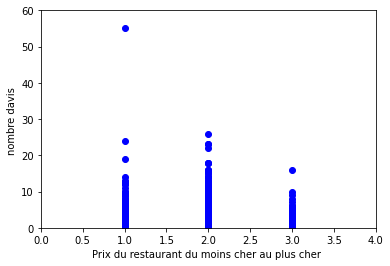

In [319]:
plt.plot(Prix_nouveau,nbr_avis_trie,'ob') # ob = type de points "o" ronds, "b" bleus

plt.ylabel('nombre davis ')

plt.xlabel('Prix du restaurant du moins cher au plus cher ')

plt.axis([0, 4, 0, 60])

plt.show()

In [333]:
new_df.sort_values(by = 'Quartier_trie')


TypeError: '<' not supported between instances of 'str' and 'int'